# MSB1015 Scientific programming
## Heart failure predicition model


During this project the goal is predicting Heart failure in the kaggle challenge Heart Failure Prediction. The database contains 12 Clinical features and 1 target. The features consitute several different data types form interger numbers, precentages, and binarized data.


### Pre-Processing
The first step was loading in the data and a preliminary exploration of the data.

In [18]:
# Importing neccesary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading in the heart failure data

df = pd.read_excel (r'Tom_data.xlsx')

# Preliminary data exploration
print(df.dtypes)
print(list(df.columns))
print(df.head())

age                         float64
anaemia                       int64
creatinine_phosphokinase    float64
diabetes                      int64
ejection_fraction           float64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                float64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object
['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                     582.0         0               20.0   
1  55.0        0                    7861.0         0               38.0   
2  65.0        0                     146.0         0               20.0   
3  50.0        1         

The data consist of of 13 columns; Age, Anaemia, Creatine_phosphokinase, Diabetes, Ejection_fraction, High_blood_pressure, Platelets, Serum_creatine, Serum_sodium, Sex, smoking, Time, and Death event. The orginal publication and meta data form the challenge provider was used, in order to better grasp how these columns were obtained. Below a list containing both a description of how these parameters were obtained and the datatype they have are displayed.
1. Age
    - This is the age of the patient at
    - interger data type
2. anaemia
    - This 
    - binary data type
3. creatine phosphokinase
    - .
    - interger data type
4. diabetes
    - .
    - binary data type
5. ejection fraction
    - .
    - fraction data type
6. high blood pressure
    - .
    - binary datatype
7. platelets
    - .
    - interger datatype
8. serum creatine
    - .
    - interger datatype
9. serum sodium
    - .
    - interger datatype
10. sex
    - sex of the patient expressed as a binary (0:male,1:female)
    - binary datatype
11. smoking
    - smoking status patient 
    - binary datatype
12. time
    - .
    - interger datatype
13. death event
    - .
    - binary datatype
    
Further manual exploration of the data showed 3 logical discprensies 

In [19]:
# changing columns (variables) to a logical data type
#   ejection fraction has a negative value and a impossible high value
#   serum_sodium has a impossible high value 

df["age"] = df["age"].apply(np.int64)
df = df.drop([149], axis=0)

Visualization was done to further explore the variables. the data was converted, for this step, into seperate dataframes, In order to get the correct visualization per data type. 

C:\Users\Tom\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


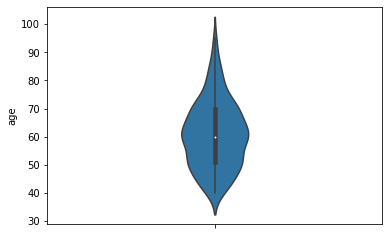

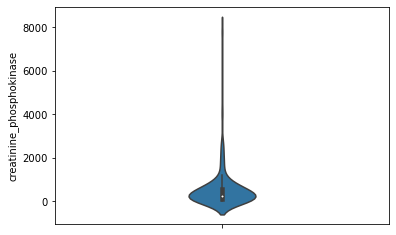

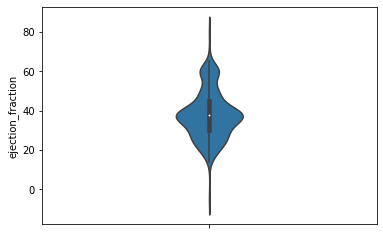

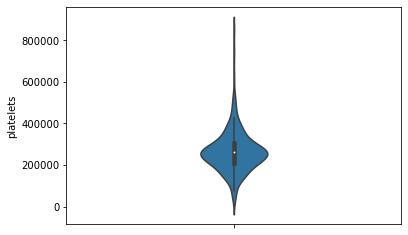

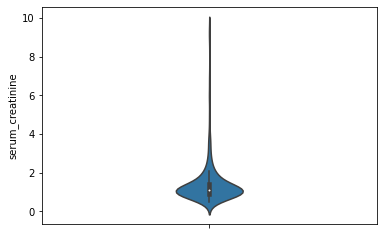

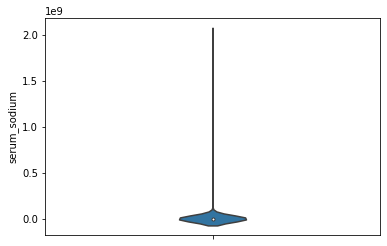

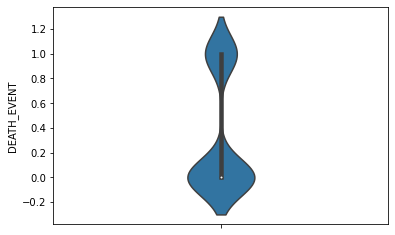

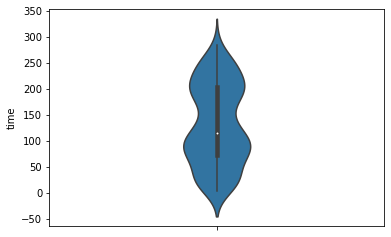

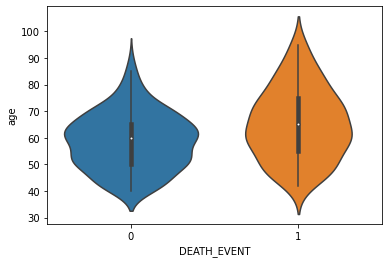

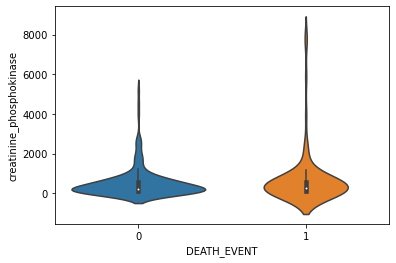

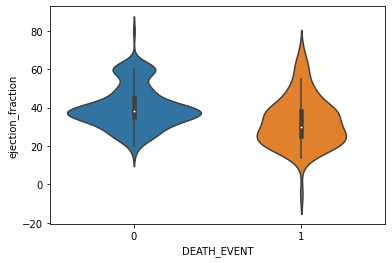

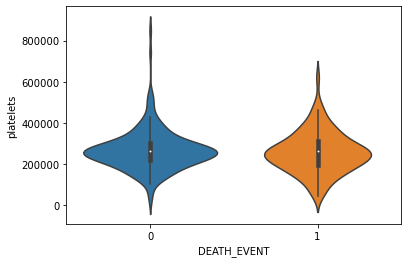

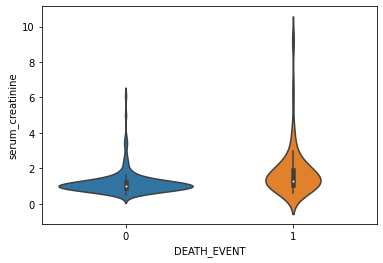

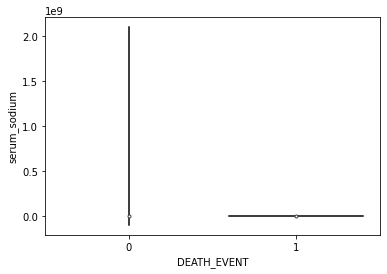

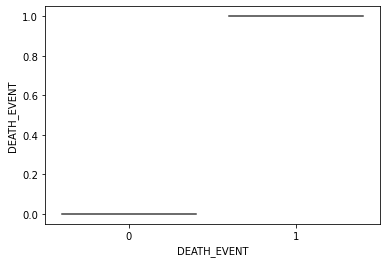

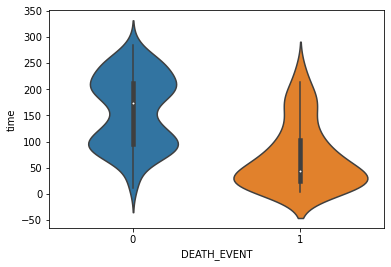

<Figure size 432x288 with 0 Axes>

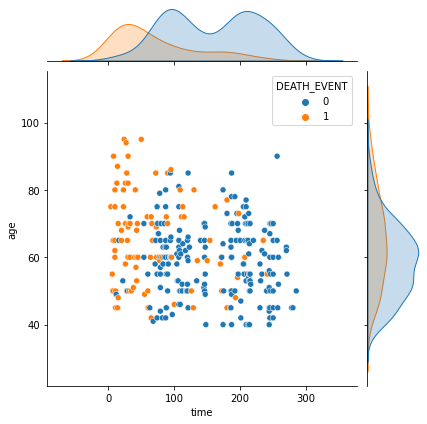

<Figure size 432x288 with 0 Axes>

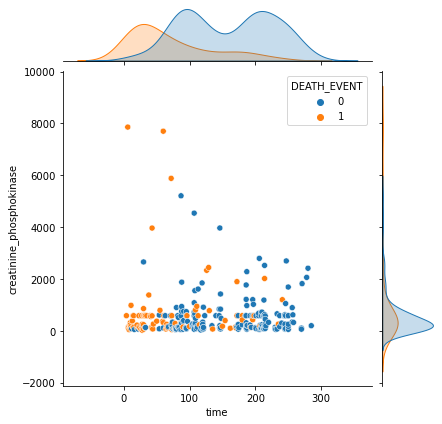

<Figure size 432x288 with 0 Axes>

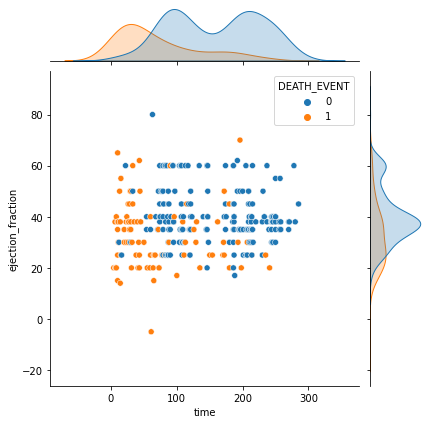

<Figure size 432x288 with 0 Axes>

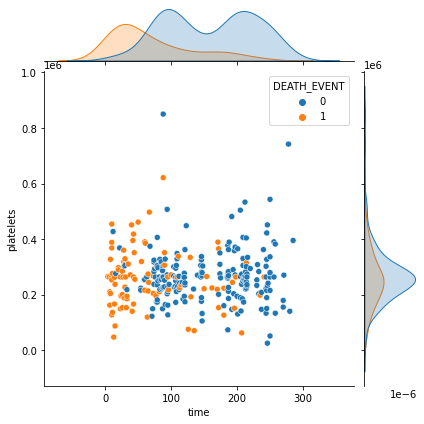

<Figure size 432x288 with 0 Axes>

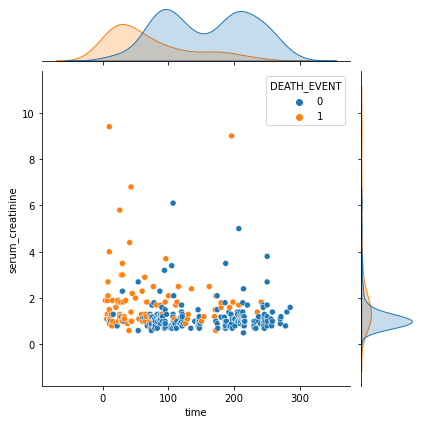

<Figure size 432x288 with 0 Axes>

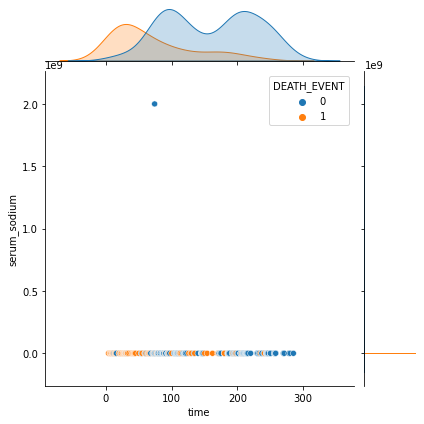

<Figure size 432x288 with 0 Axes>

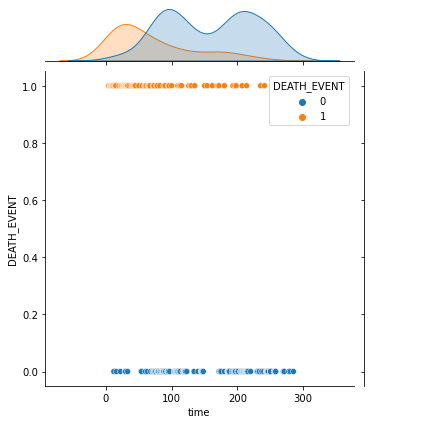

<Figure size 432x288 with 0 Axes>

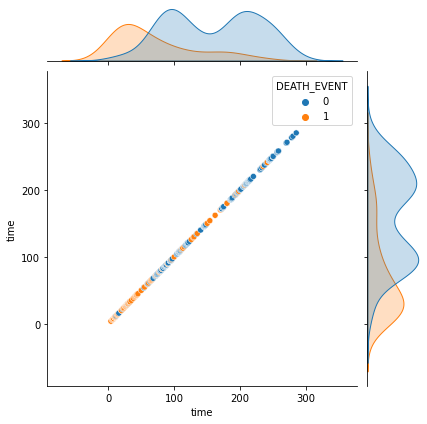

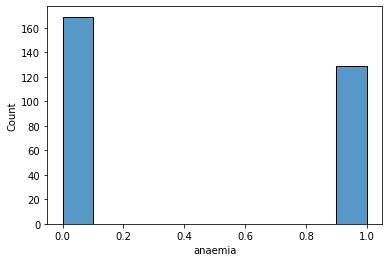

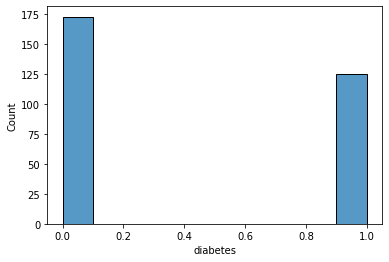

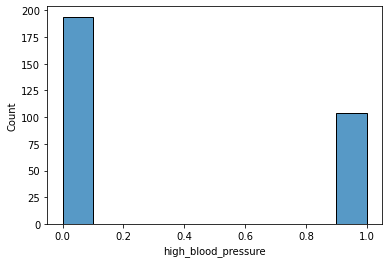

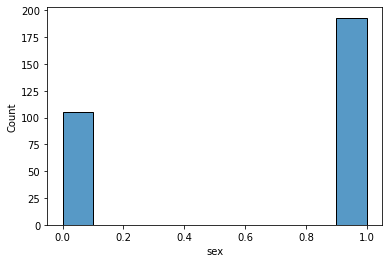

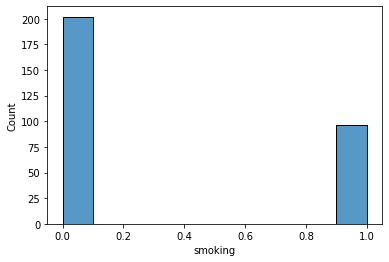

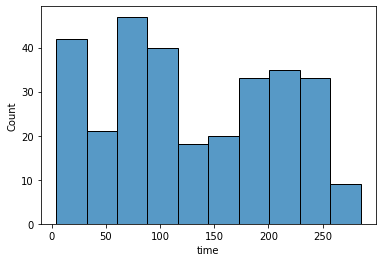

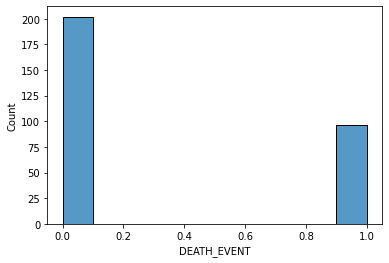

In [20]:
# seperating the different data types into sub-data frames for the visualization

df_binary = df[['anaemia',
                'diabetes',
                'high_blood_pressure',
                'sex',
                'smoking',
                'time',
                'DEATH_EVENT']]
df_interger_fraction = df[['age',
                           'creatinine_phosphokinase',
                           'ejection_fraction',
                           'platelets',
                           'serum_creatinine',
                           'serum_sodium',
                           'DEATH_EVENT',
                           'time']]

# to not get memory warnings about the amount of plots

plt.rcParams.update({'figure.max_open_warning': 0})

# violing plot, and joint plot for the interger variable type

for column in df_interger_fraction :
    plt.figure()
    sns.violinplot(y=df_interger_fraction[column],width= 0.2)

    
for column in df_interger_fraction :
    plt.figure()
    sns.violinplot(x=df_interger_fraction ['DEATH_EVENT'], y=df_interger_fraction[column])
    
for column in df_interger_fraction :
    plt.figure()
    sns.jointplot(data=df_interger_fraction, x="time", y=column, hue="DEATH_EVENT")

# histogram plots for the binary 

for column in df_binary :
    plt.figure()
    sns.histplot(data=df_binary, x=column)
 